In [22]:
import pandas as pd

import os

os.listdir()

jobs = pd.read_excel('jobsandschools.xlsx', sheet_name=0).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T

schools = pd.read_excel('jobsandschools.xlsx', sheet_name=1).set_index(
    'Unnamed: 0').fillna(0).replace('X', 1).T

jobs

Unnamed: 0,Mentions Python/Scripting languages,Mentions SQL/database languages,Mentions Big data technologies,Engineering Required,Engineering as a core focus,Traditional Machine Learning math/statistics,Modern Machine Learning math/research,Business Problem Solving,Problem solving using machine learning,Business Communication/ interaction
Google,1,1,0,1,1,1,1,1,1,0
Amazon,1,1,0,0,0,1,0,1,1,1
BofA,1,1,0,1,1,1,0,1,0,1
Two Sigma,1,0,1,1,0,1,1,1,1,1
Aetna,0,0,1,0,0,1,0,1,1,1
Coca-Cola,0,0,0,1,0,1,0,1,0,1


In [23]:
schools

Unnamed: 0,Teaches Python/Scripting languages,Teaches SQL/database languages,Teaches Big data technologies,Engineering,Engineering as a core focus,Traditional Machine Learning math/statistics,Modern Machine Learning math/research,Business Problem Solving,Problem solving using machine learning,Business Communication/ interaction
NYU,1,0,1,0,0,1,1,0,0,0
CMU - Systems,1,1,1,1,1,1,0,0,0,0
CMU - Analytics,1,0,1,0,0,1,1,0,1,0
CMU - Human Centered,1,0,0,0,0,1,0,1,1,1
Northwestern,1,1,1,0,0,1,1,1,1,1
MIT,1,1,0,0,0,1,0,1,0,1
Stanford,1,1,1,1,1,1,1,1,0,0
Berkeley,1,0,1,1,1,1,1,1,1,1


In [2]:
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt


In [19]:
def generate_kmeans_curve(data):

    Sum_of_squared_distances = []
    K = range(1,6)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

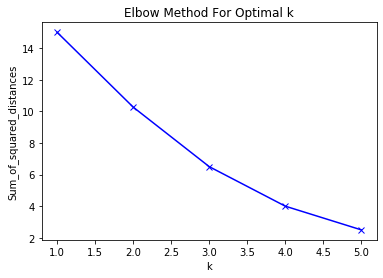

In [24]:
generate_kmeans_curve(schools)

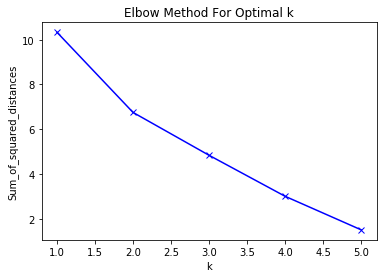

In [25]:
generate_kmeans_curve(jobs)

In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [63]:
def fit_pca(data, model):
    output = model(n_components = 2).fit_transform(data)
    #output = model.transform(data)
    return pd.DataFrame(output, index = data.index)
    

In [67]:
def scatter(data, name):
    ax = data.plot.scatter(0, 1)
    for i, txt in enumerate(data.index):
        ax.annotate(txt, (data.iloc[i, 0], data.iloc[i, 1]))
    plt.title(name)
    plt.savefig(name + '.png')
    plt.show()

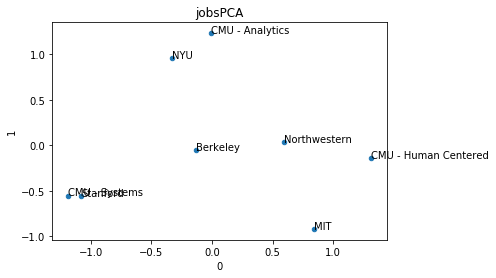

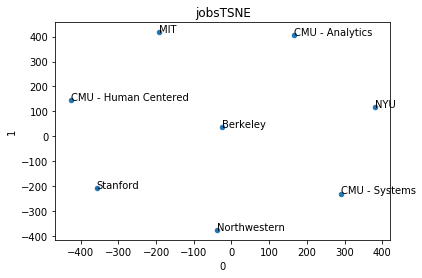

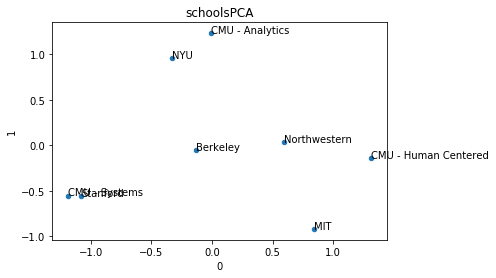

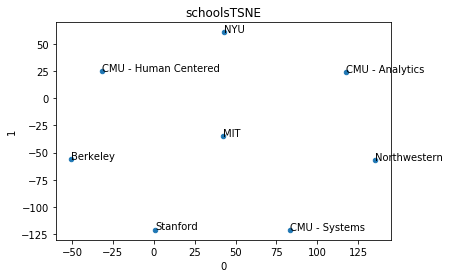

In [68]:
for raw_data, source_name in zip([jobs, schools], ['jobs', 'schools']):
    for model, modelname in zip([PCA, TSNE], ['PCA', 'TSNE']):
        data = fit_pca(schools, model)
        scatter(data, source_name + modelname)

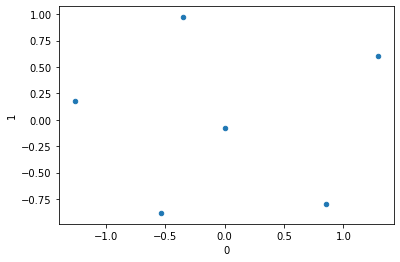

In [40]:
fit_pca(jobs).plot.scatter(0, 1)

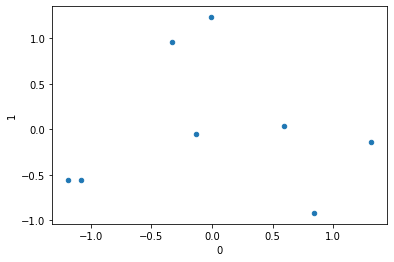

In [41]:
fit_pca(schools).plot.scatter(0, 1)